## EXPERIMENT 2.3: AdaFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import compute_metrics_ex_2_3, plot_threshold_metrics_ex_2_3
from Plotting_stats_utils.stats_tables import *


from IPython import embed


In [ ]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/ada_2_3/'

### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [2]:
# feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.2/similarity_scores_children_bibel_FINAL_INFERENCE_finetuning_2_2.pt'
feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.1/similarity_scores_children_filtered_bibel_FINAL_INFERENCE_finetuning_frozen_9_layers_2_1.pt'


image_names_all, ids_all, num_ids_all, norm_feats_all = load_adaface_vectors(feature_list_children)


# Similarity matrices from adaface - all
sim_mat_all = np.dot(norm_feats_all, norm_feats_all.T)


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv')
children_all = children_all[children_all.image_name.isin(image_names_all)]


In [3]:
children_all

,Unnamed: 0,files_list,image_name,enrolled,identity_name,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup
0,0,African_0/African_0_0.png,African_0_0,enrolled,African_0,African,7,African_0,34.0,100.0,93.0,100.0,7-9
1,1,African_1/African_1_11.png,African_1_11,enrolled,African_1,African,5,African_1,65.0,100.0,99.0,100.0,4-6
2,3,African_10/African_10_1.png,African_10_1,enrolled,African_10,African,5,African_10,50.0,100.0,97.0,100.0,4-6
3,5,African_10/African_10_4.png,African_10_4,enrolled,African_10,African,6,African_10,71.0,100.0,100.0,100.0,4-6
4,6,African_10/African_10_7.png,African_10_7,enrolled,African_10,African,7,African_10,51.0,100.0,99.0,100.0,7-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,7808,Indian_m.0h1fnvm/m.0h1fnvm_0002.jpg,m.0h1fnvm_0002,enrolled,m.0h1fnvm,Indian,8,m.0h1fnvm,54.0,100.0,86.0,100.0,7-9
3180,7809,Indian_m.0h1fnvm/m.0h1fnvm_0003.jpg,m.0h1fnvm_0003,enrolled,m.0h1fnvm,Indian,12,m.0h1fnvm,40.0,70.0,97.0,99.0,10-12
3181,7811,Indian_m.0h9448x/m.0h9448x_0001.jpg,m.0h9448x_0001,enrolled,m.0h9448x,Indian,14,m.0h9448x,53.0,99.0,100.0,100.0,13-15
3182,7812,Indian_m.0h9448x/m.0h9448x_0002.jpg,m.0h9448x_0002,enrolled,m.0h9448x,Indian,14,m.0h9448x,86.0,100.0,100.0,100.0,13-15


# Finding the right threshold

In [4]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.01).tolist()

df_all_threshold_x = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6')


FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.1
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.10800000000000001
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.11600000000000002
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.12400000000000003
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.13200000000000003
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.14000000000000004
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, perce

In [5]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.01).tolist()

df_all_threshold_x_1 = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '7-9', '10-12')


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.1
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.10800000000000001
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.11600000000000002
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.12400000000000003
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.13200000000000003
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.14000000000000004
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.14800

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.1
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.10800000000000001
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.11600000000000002
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.12400000000000003
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.13200000000000003
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.14000000000000004
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.14800

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.2200000000000001
FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.22800000000000012
FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.23600000000000013
FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.24400000000000013
FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.2520000000000001
FPD result:  0.4295683442275745
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.48239208605689365
Done for random_state: 2, percentile: 0.2600000000000001
FPD result:  0.4526443296612887
FND result:  0.5
GARBE result, GARBE close to 1 means more

In [6]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.01).tolist()

df_all_threshold_x_2 = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '13-15', '1-3')


FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.1
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.10800000000000001
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.11600000000000002
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.12400000000000003
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.13200000000000003
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.14000000000000004
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, perce

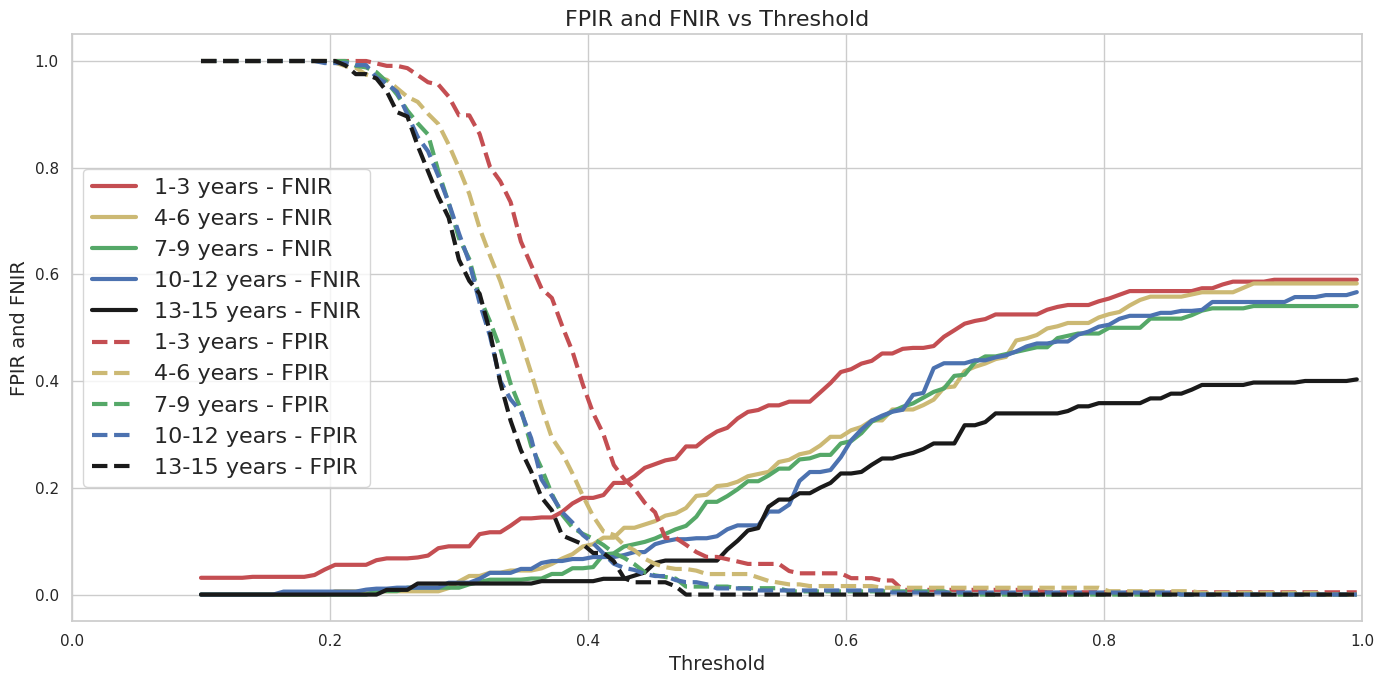

In [7]:
# plot_threshold_metrics_ex_2_3(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

plot_threshold_metrics_ex_2_3_w_conf(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

In [12]:
def balance_child_data_2_3(y_df, print_stats=False, random_state=42, age = '1-3'):
    """
    Input: raw df for children
    Returns: balanced csvs for different age groups of children
    """
    # Randomly sample 100 from each age group
    data = y_df[y_df['children_agegroup'] == age].sample(n=400, random_state=random_state, replace = True)


    return data


In [18]:

def evaluate_metrics_ex_2_3(random_states, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE,age_1, age_2, remove_ones, threshold_number, alpha_garbe=0.25):
    sim_mat_dict_all = {}
    FNIR_c_list = []
    FNIR_a_list = []
    FPIR_c_list = []
    FPIR_a_list = []
    FPD_list = []
    FND_list = []
    GARBE_list = []
    threshold_list = []

    for random_state_i in random_states:

        ### Load children and adults balanced data ###
        data_1 = balance_child_data_2_3(children_all, print_stats=False, random_state=random_state_i, age=age_1)
        data_2 = balance_child_data_2_3(children_all, print_stats=False, random_state=random_state_i, age=age_2)

        c_mates = data_1.groupby("identity_name").agg({'identity_name': ['count']})
        enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
        enrolled_image_names_c = list(data_1[data_1["identity_name"].isin(enrolled_identity_names_c)].image_name)
        non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
        non_enrolled_image_names_c = list(data_1[data_1["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
        all_reference_image_names_c = list(data_1.image_name)

        a_mates = data_2.groupby("identity_name").agg({'identity_name': ['count']})
        enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] > 1].index
        enrolled_image_names_a = list(data_2[data_2["identity_name"].isin(enrolled_identity_names_a)].image_name)
        non_enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] == 1].index
        non_enrolled_image_names_a = list(data_2[data_2["identity_name"].isin(non_enrolled_identity_names_a)].image_name)
        all_reference_image_names_a = list(data_2.image_name)

        # Similarity matrices for ids in reference database
        indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c]
        indices_a_all_reference = [image_names_a.index(name) for name in all_reference_image_names_a]

        # Extract corresponding columns from the similarity matrix
        sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]
        sim_mat_a_reference_cols = sim_mat_a[:, indices_a_all_reference]

        # Extract corresponding rows from the numerical ids
        num_ids_c_reference = num_ids_c[indices_c_all_reference]
        num_ids_a_reference = num_ids_a[indices_a_all_reference]

        # Similarity matrices for non-enrolled ids
        indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
        indices_a_non_enrolled = [image_names_a.index(name) for name in non_enrolled_image_names_a]

        sim_mat_c_non_enrolled_0 = sim_mat_c_reference_cols[indices_c_non_enrolled]
        sim_mat_a_non_enrolled_0 = sim_mat_a_reference_cols[indices_a_non_enrolled]

        num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
        num_ids_a_non_enrolled = num_ids_a[indices_a_non_enrolled]

        # Similarity matrices for enrolled ids
        indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
        indices_a_enrolled = [image_names_a.index(name) for name in enrolled_image_names_a]

        sim_mat_c_enrolled_0 = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)]
        sim_mat_a_enrolled_0 = sim_mat_a[np.ix_(indices_a_enrolled, indices_a_enrolled)]

        num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
        num_ids_a_enrolled = num_ids_a[indices_a_enrolled]

        thold = threshold_number



        # Evaluation metrics
        FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled_0, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=thold)
        FNIR_a, sim_mat_a_enrolled = compute_fnir(sim_mat_a_enrolled_0, sim_mat_a, enrolled_identity_names_a, num_ids_a_enrolled, ids_a, thold=thold)

        FPIR_c = compute_fpir(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
        FPIR_a = compute_fpir(sim_mat_a_non_enrolled_0, num_ids_a_non_enrolled, num_ids_a_reference, thold=thold)

        alpha_garbe = 0.25
        FPD_i, FND_i, GARBE_i = GARBE(FNIR_c, FNIR_a, FPIR_c, FPIR_a, alpha=alpha_garbe)

        FNIR_c_list.append(FNIR_c)
        FNIR_a_list.append(FNIR_a)
        FPIR_c_list.append(FPIR_c)
        FPIR_a_list.append(FPIR_a)
        FPD_list.append(FPD_i)
        FND_list.append(FND_i)
        GARBE_list.append(GARBE_i)
        threshold_list.append(thold)

        sim_mat_dict_all[f'sim_mat_c_enrolled_iteration_{random_state_i}'] = sim_mat_c_enrolled
        sim_mat_dict_all[f'sim_mat_a_enrolled_iteration_{random_state_i}'] = sim_mat_a_enrolled
        sim_mat_dict_all[f'sim_mat_c_non_enrolled_iteration_{random_state_i}'] = remove_ones(sim_mat_c_non_enrolled_0)
        sim_mat_dict_all[f'sim_mat_a_non_enrolled_iteration_{random_state_i}'] = remove_ones(sim_mat_a_non_enrolled_0)

        print("done")


    data = {
        'Iteration': random_states,
        'FNIR_c': FNIR_c_list,
        'FNIR_a': FNIR_a_list,
        'FPIR_c': FPIR_c_list,
        'FPIR_a': FPIR_a_list,
        'FPD': FPD_list,
        'FND': FND_list,
        'GARBE': GARBE_list,
        'Threshold': threshold_list
    }

    df_all_results = pd.DataFrame(data)
    return df_all_results, sim_mat_dict_all

In [48]:
random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results_1, sim_mat_dict_all_magface_ex2_3_1 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6' , remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_1_3 <0.05].Threshold.max()
)

df_all_results_1.rename(columns={
    'FNIR_c': 'FNIR_1_3',
    'FNIR_a': 'FNIR_4_6',
    'FPIR_c': 'FPIR_1_3',
    'FPIR_a': 'FPIR_4_6'
}, inplace=True)

# Dropping columns
df_all_results_1.drop(columns=['FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


df_all_results_1.describe().applymap(lambda x: f"{x:.3f}")

FPD result:  0.38381555153707037
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.4709538878842676
done
FPD result:  0.08489201545301528
FND result:  0.37562544674767695
GARBE result, GARBE close to 1 means more unfair:  0.30294208892401153
done
FPD result:  0.13686635944700495
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.40921658986175125
done
FPD result:  0.43897211818560056
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.48474302954640014
done
FPD result:  0.477594924159809
FND result:  0.02162849872773536
GARBE result, GARBE close to 1 means more unfair:  0.13562010508575376
done
FPD result:  0.08223966720343569
FND result:  0.2760869565217392
GARBE result, GARBE close to 1 means more unfair:  0.22762513419216332
done
FPD result:  0.2387085914354965
FND result:  0.3753191489361702
GARBE result, GARBE close to 1 means more unfair:  0.34116650956100175
done
FPD result:  0.2219755826859045
FND result:  0.5
GARBE resul

/tmp/ipykernel_39110/310086284.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results_1.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_1_3,FNIR_4_6,FPIR_1_3,FPIR_4_6
count,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.048,0.009,0.998,0.975
std,3.028,0.019,0.011,0.004,0.010
min,1.000,0.018,0.000,0.991,0.961
25%,3.250,0.036,0.000,1.000,0.968
50%,5.500,0.048,0.008,1.000,0.975
75%,7.750,0.058,0.015,1.000,0.985
max,10.000,0.086,0.033,1.000,0.988


In [49]:
random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results_2, sim_mat_dict_all_magface_ex2_3_2 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '7-9', '10-12' , remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_1_3 <0.05].Threshold.max()
)
df_all_results_2.rename(columns={
    'FNIR_c': 'FNIR_7_9',
    'FNIR_a': 'FNIR_10_12',
    'FPIR_c': 'FPIR_7_9',
    'FPIR_a': 'FPIR_10_12'
}, inplace=True)

# Dropping columns
df_all_results_2.drop(columns=['FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


df_all_results_2.describe().applymap(lambda x: f"{x:.3f}")

FPD result:  0.07025967838601359
FND result:  0.13229308005427406
GARBE result, GARBE close to 1 means more unfair:  0.11678472963720894
done


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
done


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
done


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
done
FPD result:  0.15382341348049397
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.41345585337012347
done
FPD result:  0.42760952012832965
FND result:  0.20828025477707005
GARBE result, GARBE close to 1 means more unfair:  0.26311257111488495
done
FPD result:  0.027843446283162637
FND result:  0.055555555555555546
GARBE result, GARBE close to 1 means more unfair:  0.048627528237457314
done
FPD result:  2.0876190476190524
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.8969047619047631
done
FPD result:  1.5654653561460956
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.7663663390365238
done
FPD result:  0.3714283648562632
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.4678570912140658
done


/tmp/ipykernel_39110/3091090987.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results_2.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_7_9,FNIR_10_12,FPIR_7_9,FPIR_10_12
count,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.005,0.007,0.974,0.960
std,3.028,0.007,0.007,0.010,0.013
min,1.000,0.000,0.000,0.954,0.938
25%,3.250,0.000,0.000,0.970,0.955
50%,5.500,0.000,0.007,0.974,0.964
75%,7.750,0.009,0.010,0.981,0.969
max,10.000,0.017,0.022,0.988,0.978


In [50]:
df_all_results_3, sim_mat_dict_all_magface_ex2_3_3 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '13-15', '1-3' , remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_1_3 <0.05].Threshold.max()
)



df_all_results_3.rename(columns={
    'FNIR_c': 'FNIR_13_15',
    'FPIR_c': 'FPIR_13_15',
}, inplace=True)

# Dropping columns
df_all_results_3.drop(columns=['FNIR_a','FPIR_a','FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
done
FPD result:  0.4226825633383012
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.4806706408345753
done
FPD result:  0.45459183673469344
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.4886479591836734
done
FPD result:  0.9878917378917366
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.6219729344729341
done
FPD result:  0.8676923076923077
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.5919230769230769
done
FPD result:  0.4904761904761906
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.4976190476190476
done
FPD result:  0.10772058823529373
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.40193014705882346
done
FPD result:  0.4901960784313728
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.4975490196078432
done
FPD result:  0.47916666666666635


In [46]:
df_all_results = pd.concat([df_all_results_1,df_all_results_2,df_all_results_3], axis=1)

In [47]:
df_all_results.describe().applymap(lambda x: f"{x:.3f}")


/tmp/ipykernel_39110/1142005554.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_1_3,FNIR_4_6,FPIR_1_3,FPIR_4_6,Iteration,FNIR_7_9,FNIR_10_12,FPIR_7_9,FPIR_10_12,Iteration,FNIR_13_15,FPIR_13_15
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.041,0.006,0.999,0.992,5.500,0.000,0.002,0.995,0.981,5.500,0.000,0.986
std,3.028,0.013,0.009,0.003,0.008,3.028,0.000,0.004,0.005,0.014,3.028,0.000,0.016
min,1.000,0.018,0.000,0.991,0.975,1.000,0.000,0.000,0.988,0.953,1.000,0.000,0.951
25%,3.250,0.034,0.000,1.000,0.989,3.250,0.000,0.000,0.994,0.979,3.250,0.000,0.985
50%,5.500,0.039,0.000,1.000,0.994,5.500,0.000,0.000,0.994,0.984,5.500,0.000,0.986
75%,7.750,0.048,0.011,1.000,0.999,7.750,0.000,0.000,1.000,0.992,7.750,0.000,1.000
max,10.000,0.062,0.024,1.000,1.000,10.000,0.000,0.011,1.000,0.992,10.000,0.000,1.000


In [ ]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


In [ ]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

In [ ]:
df_all_results.to_csv('df_all_results_ada_2_3.csv', index=False)


# Stats

In [ ]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_13_15'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

In [ ]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_4_6'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

In [ ]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_10_12'], df_all_results['FNIR_13_15'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

In [42]:
def process_iterations(key_pattern, output_file, sim_mat_dict, iteration_range=range(1, 11)):
    # Initialize the list to hold the arrays
    iterations = []

    # Loop to access each array and append it to the list
    for i in iteration_range:
        key = f'{key_pattern}_{i}'
        if key in sim_mat_dict:
            iterations.append(sim_mat_dict[key])

    # Concatenate all arrays into one big array
    iterations_all = np.concatenate(iterations)
    iterations_all = pd.DataFrame(iterations_all)

    # Save to CSV
    iterations_all.to_csv(output_file, index=False)

    # Print the length of the big array
    print(len(iterations_all))


In [57]:
# age = ['1-3','4-6','7-9','10-12','13-15']
# numbers = [1,2,3]

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)


# age = ['1-3', '4-6', '7-9', '10-12', '13-15']
# datasets = {
#     0: sim_mat_dict_all_magface_ex2_3_1,
#     1: sim_mat_dict_all_magface_ex2_3_1,
#     2: sim_mat_dict_all_magface_ex2_3_2,
#     3: sim_mat_dict_all_magface_ex2_3_2,
#     4: sim_mat_dict_all_magface_ex2_3_3
# }

# key_patterns = [
#     'sim_mat_c_enrolled_iteration',
#     'sim_mat_a_enrolled_iteration',
#     'sim_mat_c_non_enrolled_iteration',
#     'sim_mat_a_non_enrolled_iteration'
# ]

# for idx, age_group in enumerate(age):
#     for key_pattern in key_patterns:
#         output_file = f'{key_pattern.split("_")[2]}_iterations_all_ada_2_3_{age_group}.csv'
#         process_iterations(key_pattern, output_file, datasets[idx])


23162
20602
423738
634410


In [63]:
import pandas as pd
import numpy as np

def process_iterations(key_pattern, output_file, sim_mat_dict, iteration_range=range(1, 11)):
    iterations = []
    for i in iteration_range:
        key = f'{key_pattern}_{i}'
        if key in sim_mat_dict:
            iterations.append(sim_mat_dict[key])
    iterations_all = np.concatenate(iterations)
    iterations_all = pd.DataFrame(iterations_all)
    iterations_all.to_csv(output_file, index=False)
    print(len(iterations_all))

def descriptive_statistics(mated_scores, nonmated_scores):
    # Placeholder for your descriptive statistics function
    # Replace this with actual implementation
    stats = {
        "mean_mated": np.mean(mated_scores),
        "mean_nonmated": np.mean(nonmated_scores),
        "std_mated": np.std(mated_scores),
        "std_nonmated": np.std(nonmated_scores)
    }
    return pd.DataFrame([stats])

age = ['1-3', '4-6', '7-9', '10-12', '13-15']
datasets = {
    0: sim_mat_dict_all_magface_ex2_3_1,
    1: sim_mat_dict_all_magface_ex2_3_1,
    2: sim_mat_dict_all_magface_ex2_3_2,
    3: sim_mat_dict_all_magface_ex2_3_2,
    4: sim_mat_dict_all_magface_ex2_3_3
}

key_patterns = [
    'sim_mat_c_enrolled_iteration',
    'sim_mat_a_enrolled_iteration',
    'sim_mat_c_non_enrolled_iteration',
    'sim_mat_a_non_enrolled_iteration'
]

for idx, age_group in enumerate(age):
    for key_pattern in key_patterns:
        output_file = f'{key_pattern}_all_ada_2_3_{age_group}.csv'
        process_iterations(key_pattern, output_file, datasets[idx])

loaded_arrays = {}

for age_group in age:
    for key_pattern in key_patterns:
        filename = f'{key_pattern}_all_ada_2_3_{age_group}.csv'
        array_name = f'{key_pattern}_all_ada_{age_group.replace("-", "_")}'
        loaded_arrays[array_name] = pd.read_csv(filename).values.flatten()

# Example usage with descriptive statistics
results = {}

for age_group in age:
    mated_key = f'sim_mat_a_enrolled_iteration_all_ada_{age_group.replace("-", "_")}'
    nonmated_key = f'sim_mat_a_non_enrolled_iteration_all_ada_{age_group.replace("-", "_")}'
    if mated_key in loaded_arrays and nonmated_key in loaded_arrays:
        mated_scores = loaded_arrays[mated_key]
        nonmated_scores = loaded_arrays[nonmated_key]
        stats_system_df = descriptive_statistics(mated_scores, nonmated_scores)
        results[f'stats_system_{age_group.replace("-", "_")}'] = stats_system_df
        display(stats_system_df)

# Access specific results if needed
stats_system_1_3 = results['stats_system_1_3']
stats_system_4_6 = results['stats_system_4_6']
stats_system_7_9 = results['stats_system_7_9']
stats_system_10_12 = results['stats_system_10_12']
stats_system_13_15 = results['stats_system_13_15']


23162
20602
423738
634410
23162
20602
423738
634410
17992
13144
677502
501942
17992
13144
677502
501942
7022
23162
274113
423738


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.492458,0.047669,0.173575,0.100277


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.492458,0.047669,0.173575,0.100277


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.516806,0.046307,0.185407,0.096341


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.516806,0.046307,0.185407,0.096341


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.440273,0.066647,0.177404,0.105072


# loader sim scores

In [ ]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()


In [ ]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [ ]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

In [ ]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

In [ ]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [ ]:

# import matplotlib.pyplot as plt
# import numpy as np

# def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram"):
#     def normalise_scores(distribution):
#         return np.ones_like(distribution) / len(distribution)

#     mated_mean = np.mean(mated_scores)

#     plt.figure(figsize=(10, 6))  # Replace 'figure_size' with a specific size if not defined

#     if normalise:
#         plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')  # Replace 'mated_label' with 'Mated Scores'
#         plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')  # Replace 'nonmated_label' with 'Non-mated Scores'
#         ylabel = "Probability Density"
#     else:
#         plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Count"

#     plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

#     plt.xlabel("Comparison Score", size=12)  # Replace 'label_fontsize' with 12 or any preferred size
#     plt.ylabel(ylabel, size=12)  # Replace 'label_fontsize' with 12 or any preferred size
#     plt.title(title, size=14)  # Title added here
#     plt.grid(True)
#     plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=10)  # Adjust legend parameters as needed

#     if savename is not None:
#         plt.savefig(savename, bbox_inches="tight")
#         plt.cla()
#         plt.clf()
#         plt.close()
#     else:
#         plt.show()


In [ ]:
from DET_utils.DET_plots import *



plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - AdaFace ex. 2.1 ')


In [ ]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 2.1 ')


# DET curves


In [ ]:
from DET_utils.DET_plots import *

In [ ]:
# mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
# nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)
# plt.figure(figsize=figure_size)
# plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
# plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)
# plt.xlabel("Score", size=label_fontsize)
# plt.ylabel("Probability Density", size=label_fontsize)
# plt.grid(True)
# plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
# plt.show()

In [ ]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))

# d_prime_system3 = d_prime(mated_scores3, nonmated_scores3)
# print("d' canonical =", round(d_prime_system3, round_digits))


In [ ]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1)

In [ ]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2)

In [ ]:
system_name1 = 'Adults'
system_name2 = 'Children'

det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title="Children vs adults")
det.x_limits = np.array([1e-4, .5])
det.y_limits = np.array([1e-4, .5])
det.x_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.x_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.y_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.y_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.create_figure()
det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
det.legend_on(loc="upper right")
det.show()